# CSE527 Homework 5 - 1
**Due date: 11:59 pm EST on Dec. 1, 2022 (Thu.)**

In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

## Enable Colab GPU Acceleration
---
Navigation menu: **Runtime->Change runtime type->Hardware accelerator->GPU**

## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing 
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6.9**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - https://docs.opencv.org/4.1.2/d6/d00/tutorial_py_root.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
``` 
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```
    pip show pip
    pip --version
    pip -V
```

In case of the wrong version, use `pip3` for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open this notebook file with your Jupyter Notebook and do your homework there.*


## Description
---
In this homework, we will implement an image-to-image translation method, based on
[pix2pix](https://phillipi.github.io/pix2pix/). To be more specific,  we'll built from scratch a GAN which can translate abstract labels into facade images. 

Before we start, please read the [pix2pix paper](https://arxiv.org/pdf/1611.07004.pdf) first and understand how pix2pix works.

There are 6 parts + 1 bonus part in this homework with a total of 110 points including 10 bonus points. Be sure to read **Submission Guidelines** below. They are important.

**Do not upload** the data subfolder or trained models before submitting on blackboard due to the size limit.


## Some Tutorials (PyTorch)
---
- You will be using PyTorch for deep learning toolbox (follow the [link](http://pytorch.org) for installation).
- For PyTorch beginners, please read this [tutorial](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) before doing your homework.
- Feel free to study more tutorials at http://pytorch.org/tutorials/.
- Find cool visualization here at http://playground.tensorflow.org.

In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Replace '------' with the path such that "Surname_Givenname_SBUID_hw*" is your working directory
%cd '/content/gdrive/MyDrive/CSE527/Shah_JainamDhiren_115076341_hw5'

/content/gdrive/MyDrive/CSE527/Shah_JainamDhiren_115076341_hw5


### Part 1 Load dataset
---

We'll train a model to generate pictures of facades from label maps, using the [CMP Facade
Database](http://cmp.felk.cvut.cz/~tylecr1/facade/) . This dataset contains 606 rectified images of facades from various sources, which have been manually annotated.

**{10 points}** For the training process, we will use a batch size equal to `1`, as in the original paper. During testing, we will process `4` images in a single batch, so that we can visualize
several results at once.

Load the training set and test set under the folder `./facades`. Normalize the images to $[-1, 1]$. For each set, return a batch list. Show one image from the training set and its label side by side in a `1x2` grid.

In [ ]:
# # download the dataset
# ! chmod +x ./download_dataset.sh
# ! ./download_dataset.sh

for details.

--2022-12-03 04:15:04--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘facades.tar.gz’

facades.tar.gz      100%[===================>]  28.77M   793KB/s    in 52s     

2022-12-03 04:15:56 (571 KB/s) - ‘facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.jpg
facades/test/17.jpg
facades/test/18.j

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import random 
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
%ls 

CSE527_22F_HW5_1.ipynb  facades/        pix2pixL1.pth
download_dataset.sh*    facades.tar.gz  pix2pix.pth


<ipython-input-4-a18006391c23>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ground_truth = ground_truth.astype(np.float)/255*2-1
<ipython-input-4-a18006391c23>:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_img = label_img.astype(np.float)/255*2-1


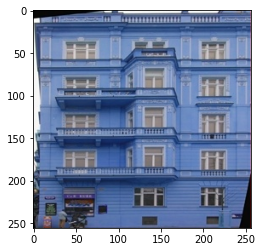

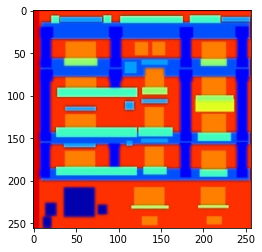

In [ ]:
from torchvision import transforms
def set_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

def load_dataset(path, shuffle=False):
    # load the images under the folder
    # remember to normalize them to [-1, 1]
    image_names = [name for name in glob.glob(path + '/*.jpg')]
    data = []
    
    ##########--WRITE YOUR CODE HERE--##########
    for name in image_names:
        #print("Loading images : %s" % name)
        img = cv2.imread(name)
        
        ground_truth = img[:,:len(img[0])//2,:]
        label_img = img[:,len(img[0])//2:,:]
        # if len(img.shape) > 2:
        #   img = np.transpose(img, [2, 0, 1])
        # ground_truth = img[:,:,:len(img[0][1])//2]
        # label_img = img[:,:,len(img[0][1])//2:]
        # ground_truth = np.array([img[0][:,:len(img[0][0])//2],img[1][:,:len(img[0][0])//2],img[2][:,:len(img[0][0])//2]])
        # label_img = np.array([img[0][:,len(img[0][0])//2:],img[1][:,len(img[0][0])//2:],img[2][:,len(img[0][0])//2:]])
        #print(ground_truth.shape," ",label_img.shape)
        # norm pixel values to [-1, 1]
        ground_truth = ground_truth.astype(np.float)/255*2-1
        label_img = label_img.astype(np.float)/255*2-1
        T = transforms.Compose([
        transforms.ToTensor(),])
        
        #data.append((torch.from_numpy(ground_truth.astype(np.float)/255*2-1),torch.from_numpy(label_img.astype(np.float)/255*2-1)))
        data.append((T(ground_truth),T(label_img)))
    if shuffle:
        random.shuffle(data) 
    
    
    ##########-------END OF CODE-------##########
    # return a list of tuples.
    # for each tuple, the first element is ground truth, the second one is label image
    # both images should be tensors
    return data


set_seeds(302)
train = load_dataset('./facades/train', shuffle=True)
test = load_dataset('./facades/test')


def show_img_pair(s_left, s_right):
    # convert the pixels back to [0, 1] when visualizing
    
    ##########--WRITE YOUR CODE HERE--##########
    def imshow(img):
      img = img / 2 + 0.5     # unnormalize
      npimg = img.numpy()
      if len(npimg.shape) > 2:
          npimg = np.transpose(img, [1, 2, 0])
      plt.figure
      plt.imshow(npimg)
      plt.show()
    imshow(s_left)
    imshow(s_right)
    ##########-------END OF CODE-------##########    
    
    
idx = 150
show_img_pair(train[idx][0], train[idx][1])

In [ ]:
train[idx][0].shape

torch.Size([3, 256, 256])

In [ ]:
import tensorflow as tf
out = tf.concat(train[idx],0)
out.shape

TensorShape([6, 256, 256])

In [ ]:
out.dtype

tf.float64

### Part 2 Models
---
In this part, we will define the network based on the architectures from the paper.
Please check the Appendix of the paper for the details of this architecture.

Let $Ck$ denote a Convolution-BatchNorm-ReLU layer with k filters. $CDk$
denotes a Convolution-BatchNormDropout-ReLU layer with a dropout rate of 50%. All
convolutions are 4 x 4 spatial filters applied with stride 2. Convolutions in the encoder,
and in the discriminator, downsample the input by a factor of 2, whereas in the decoder
they upsample the input by a factor of 2.

#### **{15 points}** (a) Generator
The U-Net encoder-decoder architecture consists of:

U-Net encoder:
$$C64-C128-C256-C512-C512-C512-C512-C512$$

U-Net decoder:

$$CD512-CD1024-CD1024-C1024-C1024-C512-C256-C128$$

After the last layer in the decoder, a convolution is applied to map to the number
of output channels, which is `3` in our problem, followed by a `tanh` function. As a
special case, batch normalization is not applied to the first $C64$ layer in the encoder.
All ReLUs in the encoder are leaky, with slope `0.2`, while ReLUs in the decoder are
not leaky.
If you are not familiar with the architecture of UNet, please check [this paper](https://arxiv.org/abs/1505.04597) first.

#### **{15 points}** (b) Discriminator

The discriminator architecture is:
$$C64-C128-C256-C512$$
After the last layer, a convolution is applied to map to a 1-dimensional output,
followed by a sigmoid function. As an exception to the above notation, batch
normalization is not applied to the first $C64$ layer. All ReLUs are leaky, with slope
`0.2`.

Hint: Use `torch.nn.functional.leaky_ReLU` for leaky ReLU.

In [ ]:
class LeakyReLU(nn.Module):
          def __init__(self,slope):
            super(LeakyReLU, self).__init__()
            self.slope=slope
          def forward(self, input: torch.Tensor) -> torch.Tensor:
            return nn.functional.leaky_relu(input,negative_slope=self.slope)

class C(nn.Module):
  def __init__(self,in_channels,out_channels,up=False,stride=2):
    super(C,self).__init__()
  
    self.features = nn.Sequential(
        nn.Conv2d(in_channels,out_channels,4,stride=stride, padding=1)
        if not up 
        else nn.ConvTranspose2d(in_channels,out_channels,4,stride=stride, padding=1),
        nn.BatchNorm2d(out_channels),
    )

  def forward(self, x):
    return nn.functional.leaky_relu(self.features(x),negative_slope=0.2)

class CD(nn.Module):
  def __init__(self,in_channels,out_channels):
    super(CD,self).__init__()

    self.features = nn.Sequential(
        nn.ConvTranspose2d(in_channels,out_channels,4,stride=2,padding=1),
        nn.BatchNorm2d(out_channels),
        nn.Dropout(),
        nn.ReLU(0),
    )

  def forward(self, x):
    return self.features(x)

In [ ]:
# discriminator
class Discriminator(nn.Module):
    def __init__(self, n_channels):
        # n_channels means num of input channels
        super(Discriminator, self).__init__()
        ##########--WRITE YOUR CODE HERE--##########
        

        self.d1= nn.Conv2d(n_channels,64,4,stride=2,padding=1)
        self.d2 = C(64,128)
        self.d3 = C(128,256)
        self.d4 = C(256,512,stride=1)
        self.disc = nn.Sequential(
            nn.Conv2d(512,1,4,stride=1,padding=1),
            nn.Sigmoid()
        )
        
      
        ##########-------END OF CODE-------##########
        
    def forward(self, x):
        ##########--WRITE YOUR CODE HERE--##########
        x = nn.functional.leaky_relu(self.d1(x),0.2)
        x = self.d2(x)
        x = self.d3(x)
        x = self.d4(x)
        x_d = self.disc(x)
        
        ##########-------END OF CODE-------##########
        return x_d

##########--WRITE YOUR CODE HERE--##########    
# netD = # initialize the discriminator
# feel free to do some sanity check here
netD = Discriminator(6)
#netD
##########-------END OF CODE-------##########    

In [ ]:
from tensorflow.python.compiler.xla import xla
class GeneratorUNet(nn.Module):
    def __init__(self, n_channels):
        super(GeneratorUNet, self).__init__()
        ##########--WRITE YOUR CODE HERE--##########
        #------ENCODER BEGIN------#
        self.d1 = nn.Conv2d(n_channels,64,4,stride=2, padding=1, padding_mode="zeros")
        self.d2 = C(64,128)
        self.d3 = C(128,256)
        self.d4 = C(256,512)
        self.d5 = C(512,512)
        self.d6 = C(512,512)
        self.d7 = C(512,512)
        self.d8 = nn.Conv2d(512,512, 4, 2, 1)
        
            #------ENCODER END------#
            #------DECODER BEGIN------#
        self.u1 = CD(512,512)
        self.u2 = CD(1024,512)
        self.u3 = CD(1024,512)
        self.u4 = C(1024,512,up=True)
        self.u5 = C(1024,256,up=True)
        self.u6 = C(512,128,up=True)
        self.u7 = C(256,64,up=True)
        
            #------DECODER END------#
        self.mapper=nn.Sequential(
            nn.ConvTranspose2d(128,3,4,stride=2,padding=1),
            nn.Tanh()
        )
        
        ##########-------END OF CODE-------##########
    
    def forward(self, x):   
        ##########--WRITE YOUR CODE HERE--##########
        d1 = nn.functional.leaky_relu(self.d1(x),0.2)
        #print(" d1 shape : ",d1.shape)
        d2 = self.d2(d1)
        #print(" d2 shape : ",d2.shape)
        d3 = self.d3(d2)
        # print(" d3 shape : ",d3.shape)
        d4 = self.d4(d3)
        # print(" d4 shape : ",d4.shape)
        d5 = self.d5(d4)
        # print(" d5 shape : ",d5.shape)
        d6 = self.d6(d5)
        # print(" d6 shape : ",d6.shape)
        d7 = self.d7(d6)
        d8 = self.d8(F.leaky_relu(d7,0.2))
        u1 = self.u1(d8)
        # print(u1.shape," ",d7.shape)
        u2 = self.u2(torch.concat([u1,d7],1))
        u3 = self.u3(torch.concat([u2,d6],1))
        
        u4 = self.u4(torch.concat([u3,d5],1))
        u5 = self.u5(torch.concat([u4,d4],1))
        # print(u5.shape," ",d3.shape)
        u6 = self.u6(torch.concat([u5,d3],1))
        u7 = self.u7(torch.concat([u6,d2],1))
        x_g = self.mapper(torch.concat([u7,d1],1))
        
        ##########-------END OF CODE-------##########
        return x_g


##########--WRITE YOUR CODE HERE--##########    
# netG = # initialize the discriminator
# netGL1 = 
# feel free to do some sanity check here
netG = GeneratorUNet(3)
netGL1 = GeneratorUNet(3)
##########-------END OF CODE-------##########  

In [ ]:
from torch.autograd import Variable


In [ ]:
train[idx][0].dtype

torch.float64

In [ ]:
inx = Variable(train[idx][1].reshape(1,3,256,256)).float()

In [ ]:
inx.shape

torch.Size([1, 3, 256, 256])

In [ ]:
op = netG(torch.randn((1, 3, 256, 256)))

In [ ]:
op = netD(torch.randn((1, 6, 256, 256)))

In [ ]:
op.shape

torch.Size([1, 1, 30, 30])

### Part 3 Optimizor
---
**{5 points}** For optimization, we'll use the Adam optimizer, with a learning rate of `0.0002`, and momentum parameters  $\beta_1= 0.5$; $\beta_2 = 0.999$.

In [ ]:
# Define the optimizors here, make sure you give them the right parameters

##########--WRITE YOUR CODE HERE--########## 

import torch.optim as optim
def Optimizer(net):
  return optim.Adam(net.parameters(),lr=0.0002,betas=(0.5,0.999))
##########-------END OF CODE-------##########

### Part 4 Training
---
**{20 points}** For each batch, first train discriminator D by using the average loss of real image and fake image. Then train generator G by using the following loss equation.
$$G^*=\arg \min_{G} \max_{D} L_{cGAN}(G, D) + \lambda L_{L1}(G) $$

In this homework, you will train two different models: one using only the L1 loss, the other using the equation above with $\lambda = 100$. 

As a sanity check, please compare your results with those in the paper (e.g. Figure 4) to make sure they roughly match.

Train the network for at least 20 epochs (at least 10 epochs for the model with only L1 loss,) but you are encouraged to train longer to obtain better results. (In the paper, they train
for 200 epochs.) Save your models to `pix2pix.pth` and `pix2pixL1.pth` using the given code. 

Note: Training training each epoch should take less than 2 minutes if you are using Colab. **Remember to save your models regularly** so you won't lose your progress accidentally.

**{5 points}** In the end, plot the Generator/Discriminator (G/D) loss history (averaged per epoch) of the two models with respect to the epoch in two plots. i.e. the first plot should contain the G/D loss of the model with L1 and cGAN, the second plot should contain the L1 loss of the other model.


In [ ]:
# codes for saving models, feel free to change them
def save_lcl1(epoch,loss_iter):
  torch.save({
      'G': netG.state_dict(),
      'D': netD.state_dict(),
      'epoch': epoch,
      'loss': loss_iter,
      }, 'pix2pix.pth')
  
def save_l1(epoch_l1,loss_iter_l1):
  torch.save({
      'G': netGL1.state_dict(),
      'epoch': epoch_l1,
      'loss': loss_iter_l1,
      }, 'pix2pixL1.pth')


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

netG = netG.to(device)
netD = netD.to(device)
netG.train()
netD.train()

##########--WRITE YOUR CODE HERE--########## 

def LcL1Gan(netG,netD,train,epoch):
  optimizer_g = Optimizer(netG)
  optimizer_d = Optimizer(netD)
  GenLoss = []
  DiscLoss = []
  loss_func = nn.functional.binary_cross_entropy_with_logits
  for (g,l) in train:
    g=g.to(device)
    l=l.to(device)
    l=Variable(l.reshape(1,3,256,256)).float()
    g=Variable(g.reshape(1,3,256,256)).float()
    gt = torch.ones((g.size(0),1,30,30)).to(device)
    lb = torch.zeros((l.size(0),1,30,30)).to(device)
    #training generator

    optimizer_g.zero_grad()

    Gxz = netG(l) # G(x,z)
    Dxg = netD(torch.concat([l,Gxz],1)) # D(x,G(x,z))

    
    loss_g = loss_func(Dxg,gt) + nn.functional.l1_loss(g,Gxz)*100  # LcGan + lamda* L1, where lambda = 100
    loss_g.backward()
    optimizer_g.step()

    GenLoss.append(loss_g.item())

    #training discriminator
    optimizer_d.zero_grad()
    Dxy = netD(torch.concat([l,g],1))

    Dxg_detached = netD(torch.concat([l,Gxz.detach()],1))
    loss_d = (loss_func(Dxy,gt) + loss_func(Dxg_detached,lb)) /2

    loss_d.backward()
    optimizer_d.step()

    DiscLoss.append(loss_d.item())

  
  mean_gen_loss, mean_dis_loss = np.mean(GenLoss), np.mean(DiscLoss)
  print("Epoch : %d Mean Genrator Loss : %.4f Mean Discriminator Loss : %.4f " % (epoch, mean_gen_loss, mean_dis_loss))
  save_lcl1(epoch,[mean_gen_loss,mean_dis_loss])

  return mean_gen_loss, mean_dis_loss

epochs = 20
Gen_Losses = []
Disc_Losses = []
for epoch in range(epochs):
  Gen_Loss, Disc_Loss = LcL1Gan(netG,netD,train,epoch)
  Gen_Losses.append(Gen_Loss)
  Disc_Losses.append(Disc_Loss)

##########-------END OF CODE-------##########

Epoch : 0 Mean Genrator Loss : 36.6772 Mean Discriminator Loss : 0.5735 
Epoch : 1 Mean Genrator Loss : 35.7667 Mean Discriminator Loss : 0.5546 
Epoch : 2 Mean Genrator Loss : 35.3286 Mean Discriminator Loss : 0.5421 
Epoch : 3 Mean Genrator Loss : 34.9594 Mean Discriminator Loss : 0.5314 
Epoch : 4 Mean Genrator Loss : 34.5265 Mean Discriminator Loss : 0.5097 
Epoch : 5 Mean Genrator Loss : 33.9934 Mean Discriminator Loss : 0.5065 
Epoch : 6 Mean Genrator Loss : 33.2769 Mean Discriminator Loss : 0.5043 
Epoch : 7 Mean Genrator Loss : 32.5895 Mean Discriminator Loss : 0.5062 
Epoch : 8 Mean Genrator Loss : 31.8549 Mean Discriminator Loss : 0.5038 
Epoch : 9 Mean Genrator Loss : 31.1071 Mean Discriminator Loss : 0.5038 
Epoch : 10 Mean Genrator Loss : 30.4181 Mean Discriminator Loss : 0.5040 
Epoch : 11 Mean Genrator Loss : 29.7403 Mean Discriminator Loss : 0.5046 
Epoch : 12 Mean Genrator Loss : 29.1389 Mean Discriminator Loss : 0.5041 
Epoch : 13 Mean Genrator Loss : 28.5575 Mean Dis

In [ ]:
netGL1 = netGL1.to(device)
netGL1.train()

##########--WRITE YOUR CODE HERE--########## 

def L1Gan(netGL1,train,epoch):
    L1_Gen_Loss = []
    optimizer_gl1 = Optimizer(netGL1)
    for (g,l) in train:
        g=g.to(device)
        l=l.to(device)
        l=Variable(l.reshape(1,3,256,256)).float()
        g=Variable(g.reshape(1,3,256,256)).float()
        gt = torch.ones((g.size(0),1,30,30)).to(device)
        lb = torch.zeros((l.size(0),1,30,30)).to(device)

        optimizer_gl1.zero_grad()

        Gxz = netGL1(l)
        loss_g = F.l1_loss(g,Gxz)
        loss_g.backward()
        optimizer_gl1.step()
        L1_Gen_Loss.append(loss_g.item())
    mean_gen_loss=np.mean(L1_Gen_Loss)
    print("Epoch : %d Mean Genrator Loss : %.4f" % (epoch, mean_gen_loss))
    save_l1(epoch,mean_gen_loss)

    return mean_gen_loss

l1_epochs = 20
L1_Gen_Losses = []
for epoch in range(l1_epochs):
    GL1_Loss = L1Gan(netGL1,train,epoch)
    L1_Gen_Losses.append(GL1_Loss)
##########-------END OF CODE-------##########

Epoch : 0 Mean Genrator Loss : 0.3789
Epoch : 1 Mean Genrator Loss : 0.3546
Epoch : 2 Mean Genrator Loss : 0.3489
Epoch : 3 Mean Genrator Loss : 0.3450
Epoch : 4 Mean Genrator Loss : 0.3410
Epoch : 5 Mean Genrator Loss : 0.3361
Epoch : 6 Mean Genrator Loss : 0.3307
Epoch : 7 Mean Genrator Loss : 0.3250
Epoch : 8 Mean Genrator Loss : 0.3177
Epoch : 9 Mean Genrator Loss : 0.3109
Epoch : 10 Mean Genrator Loss : 0.3036
Epoch : 11 Mean Genrator Loss : 0.2967
Epoch : 12 Mean Genrator Loss : 0.2905
Epoch : 13 Mean Genrator Loss : 0.2845
Epoch : 14 Mean Genrator Loss : 0.2769
Epoch : 15 Mean Genrator Loss : 0.2704
Epoch : 16 Mean Genrator Loss : 0.2631
Epoch : 17 Mean Genrator Loss : 0.2565
Epoch : 18 Mean Genrator Loss : 0.2502
Epoch : 19 Mean Genrator Loss : 0.2443


In [ ]:
# codes for restoring models, feel free to change them

path = "pix2pix.pth"
checkpoint = torch.load(path)
netG.load_state_dict(checkpoint['G'])
netD.load_state_dict(checkpoint['D'])
epoch = checkpoint['epoch']
loss_iter = checkpoint['loss']

path = "pix2pixL1.pth"
checkpoint = torch.load(path)
netGL1.load_state_dict(checkpoint['G'])
epoch_l1 = checkpoint['epoch']
loss_iter_l1 = checkpoint['loss']


In [ ]:
epochs = 50
for epoch in range(epochs):
  Gen_Loss, Disc_Loss = LcL1Gan(netG,netD,train,epoch)
  Gen_Losses.append(Gen_Loss)
  Disc_Losses.append(Disc_Loss)

Epoch : 0 Mean Genrator Loss : 31.0920 Mean Discriminator Loss : 0.5032 
Epoch : 1 Mean Genrator Loss : 28.2763 Mean Discriminator Loss : 0.5034 
Epoch : 2 Mean Genrator Loss : 26.6238 Mean Discriminator Loss : 0.5032 
Epoch : 3 Mean Genrator Loss : 25.6290 Mean Discriminator Loss : 0.5038 
Epoch : 4 Mean Genrator Loss : 24.6223 Mean Discriminator Loss : 0.5035 
Epoch : 5 Mean Genrator Loss : 24.1872 Mean Discriminator Loss : 0.5032 
Epoch : 6 Mean Genrator Loss : 23.4014 Mean Discriminator Loss : 0.5033 
Epoch : 7 Mean Genrator Loss : 22.8263 Mean Discriminator Loss : 0.5039 
Epoch : 8 Mean Genrator Loss : 22.2384 Mean Discriminator Loss : 0.5033 
Epoch : 9 Mean Genrator Loss : 21.8204 Mean Discriminator Loss : 0.5036 
Epoch : 10 Mean Genrator Loss : 21.1473 Mean Discriminator Loss : 0.5041 
Epoch : 11 Mean Genrator Loss : 20.5975 Mean Discriminator Loss : 0.5032 
Epoch : 12 Mean Genrator Loss : 20.1271 Mean Discriminator Loss : 0.5040 
Epoch : 13 Mean Genrator Loss : 19.7447 Mean Dis

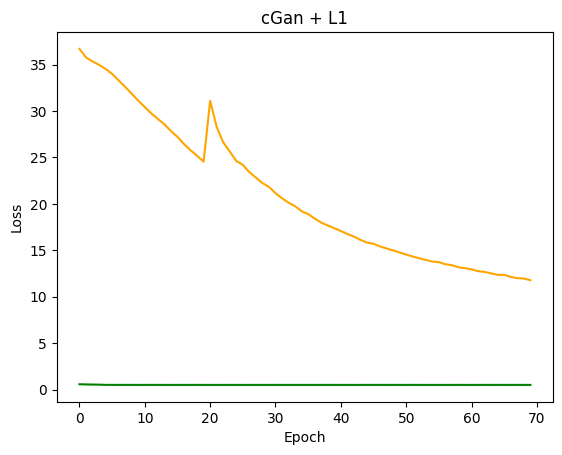

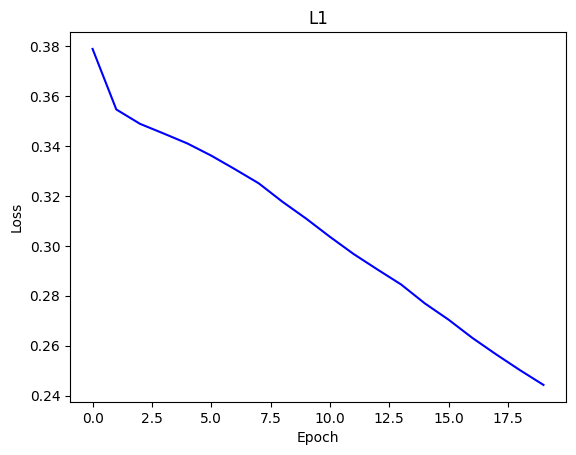

In [ ]:
# Plot the loss

##########--WRITE YOUR CODE HERE--##########
plt.plot(Gen_Losses,'orange')
plt.plot(Disc_Losses,'g')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('cGan + L1')
plt.show()

plt.plot(L1_Gen_Losses , 'b')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('L1')
plt.show()


##########-------END OF CODE-------##########

For the First Graph ( titled 'cGan+L1') the orangecurve represents the Generator Loss and The green curve represents the Discriminator Loss.

For the 2nd plot, the blue curve represents the Generator Loss.

### Part 5 Evaluation
---

Compared to a classification problem, evaluating an image translation model could be tricky because we don't always have the ground-truth available. There are several different ways to compare the performance of different GAN models:

1. Visualize the generated images of different GAN models. 

2. Compute a distance, such as **Frechet Inception Distance** (**FID**, the smaller the better, [paper](https://arxiv.org/abs/1706.08500)), between the generated images and the real images, or compute the Inception Score (**IS**, the higher the better, [paper](https://arxiv.org/pdf/1606.03498.pdf)) for the generated images. We strongly encourage you to read these papers.

3. Using generated images for downstream tasks, such as classification, segmentation, etc. and computing the task accuracy.

Now it's your turn to evaluate the models you trained. 

**{5 points}** We'll first visualize `4` test samples and plot them as in Figure 4 in the pix2pix paper, to get some qualitative results. You can select any interesting samples from the **test set**.

**{5 points}** Then let's do some quantitative analysis. Adapt this **Inception Score** ([ref](https://github.com/sbarratt/inception-score-pytorch/blob/master/inception_score.py)) implementation, and report the mean score of each model on the test set. Again, you are encouraged to train your models longer.

In [ ]:
print(device == torch.device("cuda"))

True


	Input		Groud truth		L1		L1+cGAN


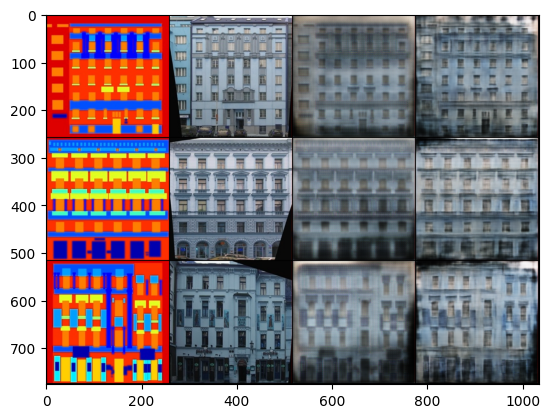

In [ ]:
# Visualization
# Please read Figure 4 in the pix2pix paper first

##########--WRITE YOUR CODE HERE--##########
import torchvision
from torchvision.utils import save_image
res = []
count = 0
netG.eval()
netGL1.eval()
for (g,l) in test:
    g = Variable(g.reshape(1,3,256,256)).float()
    l = Variable(l.reshape(1,3,256,256)).float()
    Dxz = netG(l.to(device))
    Dxz_l1 = netGL1(l.to(device))
    res += [l[0], g[0], Dxz_l1[0].cpu(),Dxz[0].cpu()]
    count+=1
    if count == 3:
        break

save_image(res, "results.png", nrow=4, normalize=True)

print('\tInput\t\tGroud truth\t\tL1\t\tL1+cGAN')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 # display it
fig = mpimg.imread('results.png')
plt.imshow(fig)
plt.show()

##########-------END OF CODE-------##########

In [ ]:
print(device == "cuda")

False


In [ ]:
# Inception Scores
from torchvision.models.inception import inception_v3
from scipy.stats import entropy

dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
inception_model = inception_v3(pretrained=True, transform_input=False).type(dtype)
inception_model.eval();
up = nn.Upsample(size=(299, 299), mode='bilinear', align_corners=True).type(dtype)

def inception_score(images, splits=10):
    ##########--WRITE YOUR CODE HERE--##########
    N = len(images)
    #print(N)
    batch_size = 1
    assert batch_size > 0
    assert N > batch_size

    # Set up dataloader
    dataloader = torch.utils.data.DataLoader(images, batch_size=batch_size)

    def get_pred(x):
        x = inception_model(x)
        return F.softmax(x).data.cpu().numpy()

    # Get predictions
    preds = np.zeros((N, 1000))

    for i, batch in enumerate(dataloader, 0):
        print( batch)
        batch = batch[0].type(dtype)
        batchv = Variable(batch)
        batch_size_i = batch.size()[0]

        preds[i*batch_size:i*batch_size + batch_size_i] = get_pred(batchv)

    # Now compute the mean kl-div
    split_scores = []

    for k in range(splits):
        part = preds[k * (N // splits): (k+1) * (N // splits), :]
        py = np.mean(part, axis=0)
        scores = []
        for i in range(part.shape[0]):
            pyx = part[i, :]
            scores.append(entropy(pyx, py))
        split_scores.append(np.exp(np.mean(scores)))
    
    ##########-------END OF CODE-------##########
    return np.mean(split_scores)


# Get the translation on test set
##########--WRITE YOUR CODE HERE--##########
test_pred = []
test_pred_l1 = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
netG.to(device)
netGL1.to(device)
netG.eval()
netGL1.eval()
count = 0
for (g,l) in test:
    count+=1
    img = netG(Variable(l.reshape(1,3,256,256).to(device)).float())
    img_l1=netGL1(Variable(l.reshape(1,3,256,256).to(device)).float())
    test_pred.append(img)
    test_pred_l1.append(img_l1)

##########-------END OF CODE-------##########

inception_s = inception_score(test_pred)
inception_s_l1 = inception_score(test_pred_l1)
print("IS for different losses, evaluated on facades dataset")
from IPython.display import HTML, display
import tabulate
table = [["Loss","IS ↑"],
         ["L1", f"{inception_s_l1:.4f}"],
         ["L1 + cGAN", f"{inception_s:.4f}"]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers="firstrow")))

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


106
tensor([[[[[ 0.4690,  0.7595,  0.7703,  ...,  0.6311,  0.6512,  0.5088],
           [ 0.6854,  0.8360,  0.8250,  ...,  0.6709,  0.6660,  0.6977],
           [ 0.7100,  0.8425,  0.8598,  ...,  0.7111,  0.6600,  0.6604],
           ...,
           [-0.8268, -0.8161, -0.8268,  ..., -0.9161, -0.9212, -0.4800],
           [-0.8042, -0.8369, -0.8460,  ..., -0.9061, -0.8812, -0.4755],
           [-0.7253, -0.8088, -0.8467,  ..., -0.8485, -0.8512, -0.3993]],

          [[ 0.4071,  0.6929,  0.7457,  ...,  0.5626,  0.5019,  0.3052],
           [ 0.6824,  0.7712,  0.8012,  ...,  0.5910,  0.5824,  0.4361],
           [ 0.6947,  0.8065,  0.8157,  ...,  0.5071,  0.5588,  0.3987],
           ...,
           [-0.7874, -0.7956, -0.8136,  ..., -0.9039, -0.9077, -0.8721],
           [-0.7667, -0.8278, -0.8259,  ..., -0.8914, -0.8778, -0.8338],
           [-0.6555, -0.8135, -0.8435,  ..., -0.8363, -0.8516, -0.6036]],

          [[ 0.3128,  0.7117,  0.7351,  ...,  0.5060,  0.4386,  0.1956],
           

<ipython-input-10-abce2d5676d7>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x).data.cpu().numpy()


Streaming output truncated to the last 5000 lines.
           [-0.8114, -0.8868, -0.9097,  ..., -0.6510, -0.6766, -0.2759]],

          [[ 0.1011,  0.2036,  0.2288,  ...,  0.7717,  0.7177,  0.4934],
           [ 0.2125,  0.2758,  0.2599,  ...,  0.8020,  0.7669,  0.6748],
           [ 0.2186,  0.2982,  0.3088,  ...,  0.7306,  0.7675,  0.6360],
           ...,
           [-0.8888, -0.9026, -0.9198,  ..., -0.6880, -0.7177, -0.7212],
           [-0.8635, -0.9094, -0.9121,  ..., -0.6438, -0.6773, -0.6851],
           [-0.7494, -0.8903, -0.9050,  ..., -0.6072, -0.6648, -0.4490]],

          [[ 0.0119,  0.2247,  0.2347,  ...,  0.7087,  0.6671,  0.3648],
           [ 0.1666,  0.1954,  0.2364,  ...,  0.7415,  0.6803,  0.6328],
           [ 0.1868,  0.2460,  0.2464,  ...,  0.7480,  0.6991,  0.5633],
           ...,
           [-0.8923, -0.9144, -0.9154,  ..., -0.6524, -0.7315, -0.7433],
           [-0.8806, -0.9166, -0.9083,  ..., -0.6583, -0.6596, -0.6450],
           [-0.7805, -0.8735, -0.9013

Loss,IS ↑
L1,2.6112
L1 + cGAN,2.371


(For the above the Inception Score Table is at the end of output)

### Part 6 Understanding pix2pix
---
#### {5 points}Problem 1  
What image sizes can Pix2pix train with, and why can it handle different image sizes?

Hint: Explain this based on the generator and discriminator architectures.

#### {5 points}Problem 2 

Given an input image with size $256\times256\times6$ for the discriminator, write down the size of each neuron's receptive field after each layer, using the **discriminator** network architectures above:

e.g. $$Input → C64 → (?) → C128 →(?) → C256 → (?) → C512 → (?)$$

**Make sure you calculate the receptive field, not the size of the image.**

#### {5 points}Problem 3
Explain why minimizing only the L1 loss results in a blurry image. 


#### {5 points}Problem 4
Why do we use PatchGAN in Pix2pix? 


Answer:
<br>
Problem 1<br>
Pix2Pix can train with any image sizes. <br>
Reason : Fully-convolutional translation An advantage of the PatchGAN is that a fixed-size patch discriminator can be applied to arbitrarily large images. We may also apply the generator convolutionally to larger images than those on which it was trained.

Problem 2<br>
We know that Receptive Field of Layer L = Stride * Receptive Field for Layer L-1 + (Kernel Size - Stride)<br>
Initially r = 1<br>
For L1, r = 2\*1 + (4-2) = 4<br>
For L2, r = 2\*4 + (4-2) = 10<br>
For L3, r = 2\*10 + (4-2) = 22<br>
For L4, r = 2\*22 + (4-2) = 46<br>

Problem 3<br>
Minimizing only L1 gives blurry image as L1 will incentivize a blur when it is uncertain where exactly to locate an edge, it will also incentivize an average, grayish color when it is uncertain which of several plausible color values a pixel should take on. Specially,
L1 will be minimized by choosing the median of the conditional probability density function over possible colors.<br> 

Problem 4 <br>
PatchGAN promotes sharp outputs, and achieves good FCN-scores, but also leads to tiling artifacts. The 70 × 70 PatchGAN alleviates these artifacts and achieves slightly better scores

### {10 points} Bonus: Spectral Normalization

Spectral normalization (**SN**, [paper](https://arxiv.org/abs/1802.05957)) is a simple and useful technique for stabilizing GAN training. Replace `batch normalization` with `spectral normalization` in both discriminator and generator, train the new model with the same L1 and cGAN loss for at least 20 epochs, then save the model to `pix2pixSN.pth`. Finally, perform the same evaluation you did in part 5 and compare the performance of all the models you trained.

Hint: use `torch.nn.utils.spectral_norm`.


## Submission guidelines
---
We will grade your homework based on your submitted notebook file. We will check the notebook for both results and code. Please make sure you run your code and print out the results in the notebook before submitting (we expect to see the results before running your code by ourselves.)

You submit your homework by first creating a ***google shared link*** of a folder for your homework (described below), and put that link into the ***text submission section*** of your homework submission on Blackboard. ([How to submit your link?](https://drive.google.com/file/d/16-FlPSiu5n-pRezLfcbAvgYxXtGtrs16))

To generate the ***google shared link***, first create a folder named ***Surname_Givenname_SBUID_hw**** in your Google Drive with your CS account (or your SBU account if you don't have a CS account). The structure of the files in the folder should be exactly the same as the one you downloaded. For instance in this homework:

```
Surname_Givenname_SBUID_hw5
        |---CSE527-22F-HW5.ipynb
```
Note that this folder should be in your Google Drive with your account.

Then right click this folder, click ***Get shareable link***, in the People textfield, enter the TAs' email: ***haoyuwu@cs.stonybrook.edu*** and ***vhnguyen@cs.stonybrook.edu***. Make sure that the TAs who have the link **can edit**, ***not just*** **can view**, and also **uncheck** the **Notify people** box. ([How to share link?](https://drive.google.com/file/d/17R6j6yE8_8vXioOB3nNvbEPzxcI-rr_H) )

***IMPORTANT: Please do not make any modification to the folder and its files after the submission deadline***. (All modifications can be seen by the TAs via the revision history.) Note that in google colab, we will only grade the version of the code right before the timestamp of the submission made in blackboard.

The input and output paths are predefined and **DO NOT** change them, (we assume that 'Surname_Givenname_SBUID_hw1' is your working directory, and all the paths are relative to this directory).  The image read and write functions are already written for you. All you need to do is to fill in the blanks as indicated to generate proper outputs.


-- DO NOT change the folder structure, please just fill in the blanks. <br>

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be delays in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

If you alter the folder structures, the grading of your homework will be significantly delayed and possibly penalized.

Be aware that your code will undergo plagiarism check both vertically and horizontally. Please do your own work.

Late submission penalty: <br>
There will be a 10% penalty per day for late submission. However, you will have 4 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.
